# Module 2: Linear Filters and Edge Detection

This module covers linear filters, convolution, edge detection, and related concepts such as shift invariance, spatial frequency, and Fourier transforms.

---
### 1. Linear Filters and Convolution
Linear filters are used to modify an image by performing a mathematical operation, commonly referred to as convolution. Convolution is the process of applying a filter (kernel) over an image, which combines the pixel values with the filter's values to produce a new image.

In the context of image processing, convolution is often used for operations like blurring, sharpening, and edge detection.

#### Steps:
1. **Define the filter (kernel):** A small matrix, e.g., a 3x3 or 5x5 matrix.
2. **Convolution operation:** Slide the filter across the image and calculate the weighted sum of the pixel values it overlaps.
3. **Output:** The resulting image after applying the convolution.

We will apply a simple **Gaussian filter** and a **Sobel filter** for edge detection.
ult of the sum.


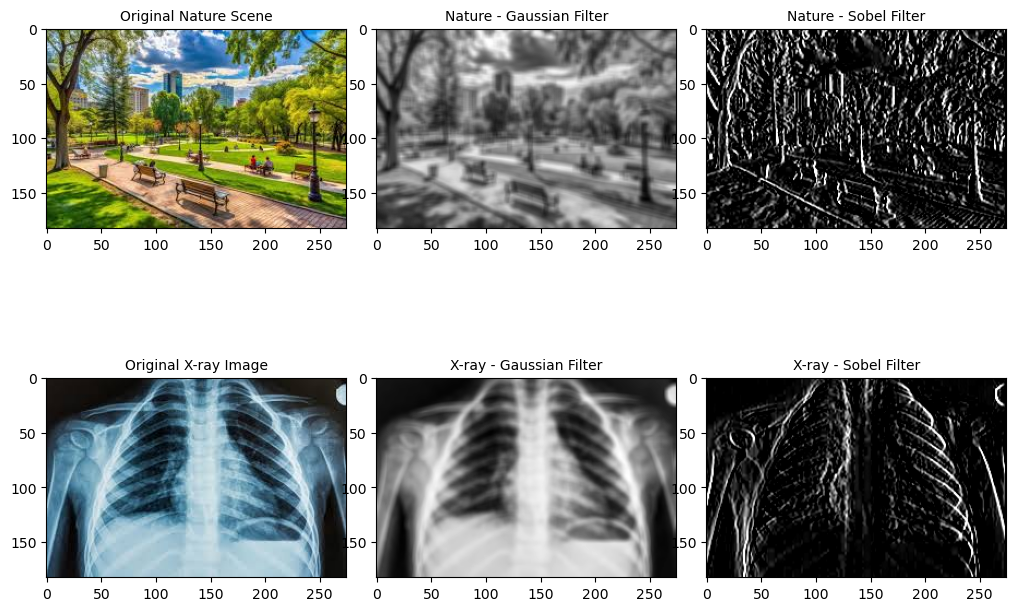

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the images
nature_img = cv2.imread('nature_scene.jpg')  
xray_img = cv2.imread('x-ray.jpg')

# Convert to grayscale for convolution
nature_gray = cv2.cvtColor(nature_img, cv2.COLOR_BGR2GRAY)
xray_gray = cv2.cvtColor(xray_img, cv2.COLOR_BGR2GRAY)

# Define a kernel for Gaussian Blur
gaussian_kernel = np.ones((5, 5), np.float32) / 25

# Apply convolution (Gaussian Blur)
nature_gaussian = cv2.filter2D(nature_gray, -1, gaussian_kernel)
xray_gaussian = cv2.filter2D(xray_gray, -1, gaussian_kernel)

# Apply Sobel filter for edge detection
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
nature_sobel = cv2.filter2D(nature_gray, -1, sobel_x)
xray_sobel = cv2.filter2D(xray_gray, -1, sobel_x)

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the images using subplot and reduce space
plt.subplot(2, 3, 1)
plt.title('Original Nature Scene', fontsize=10)
plt.imshow(cv2.cvtColor(nature_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Nature - Gaussian Filter', fontsize=10)
plt.imshow(nature_gaussian, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Nature - Sobel Filter', fontsize=10)
plt.imshow(nature_sobel, cmap='gray')

plt.subplot(2, 3, 4)
plt.title('Original X-ray Image', fontsize=10)
plt.imshow(cv2.cvtColor(xray_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title('X-ray - Gaussian Filter', fontsize=10)
plt.imshow(xray_gaussian, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('X-ray - Sobel Filter', fontsize=10)
plt.imshow(xray_sobel, cmap='gray')

# Adjust the spacing between subplots to remove unnecessary gaps
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.2)

# Display the plot
plt.show()


---

### 2. Shift Invariant Linear Systems
A shift-invariant linear system is a system where the behavior does not change when the input is shifted. In image processing, a shift-invariant system means that if an image is shifted, the result after applying the filter will also be shifted by the same amount.

This property is important for operations like convolution because it ensures that filters work the same way no matter where they are applied in the image.

In our case, we apply the same Gaussian filter (as in the previous step) to both images, and you will notice that the output is also shift-invariant.


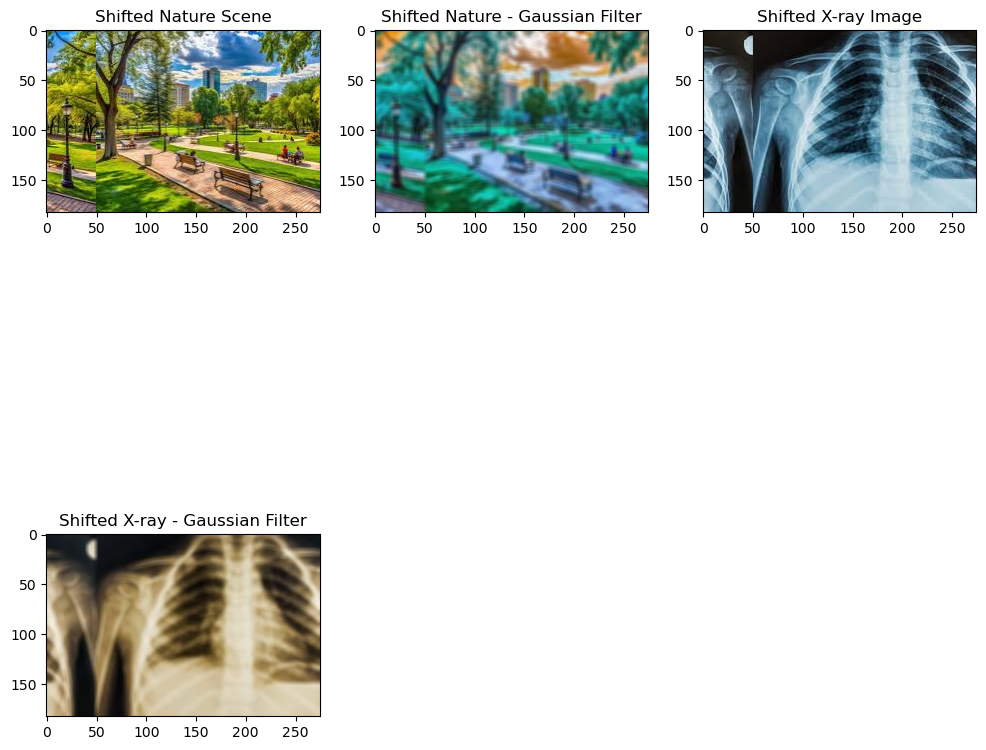

In [28]:
# Shift the image and apply the same Gaussian filter
shifted_nature = np.roll(nature_img, 50, axis=1)  # Shift right by 50 pixels
shifted_xray = np.roll(xray_img, 50, axis=1)      # Shift right by 50 pixels

# Apply Gaussian filter on shifted images
shifted_nature_gaussian = cv2.filter2D(shifted_nature, -1, gaussian_kernel)
shifted_xray_gaussian = cv2.filter2D(shifted_xray, -1, gaussian_kernel)

# Display the results
plt.figure(figsize=(12, 12))

# Shifted Nature Image
plt.subplot(2, 3, 1)
plt.title('Shifted Nature Scene')
plt.imshow(cv2.cvtColor(shifted_nature, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Shifted Nature - Gaussian Filter')
plt.imshow(shifted_nature_gaussian, cmap='gray')

# Shifted X-ray Image
plt.subplot(2, 3, 3)
plt.title('Shifted X-ray Image')
plt.imshow(cv2.cvtColor(shifted_xray, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title('Shifted X-ray - Gaussian Filter')
plt.imshow(shifted_xray_gaussian, cmap='gray')


plt.show()


---

### 3. Spatial Frequency and Fourier Transforms
Fourier transforms allow us to analyze the frequency components of an image. In the context of image processing, we are interested in **spatial frequency**, which refers to the rate of change of intensity in an image. Low-frequency components represent smooth changes in intensity, while high-frequency components represent edges and fine details.

The Fourier Transform allows us to move from the spatial domain to the frequency domain, where we can manipulate the frequencies directly (e.g., filtering out high frequencies for blurring).

#### Steps:
1. Convert the image into the frequency domain using the **FFT (Fast Fourier Transform)**.
2. Filter or manipulate the frequency components.
3. Convert back to the spatial domain using the **Inverse FFT**.


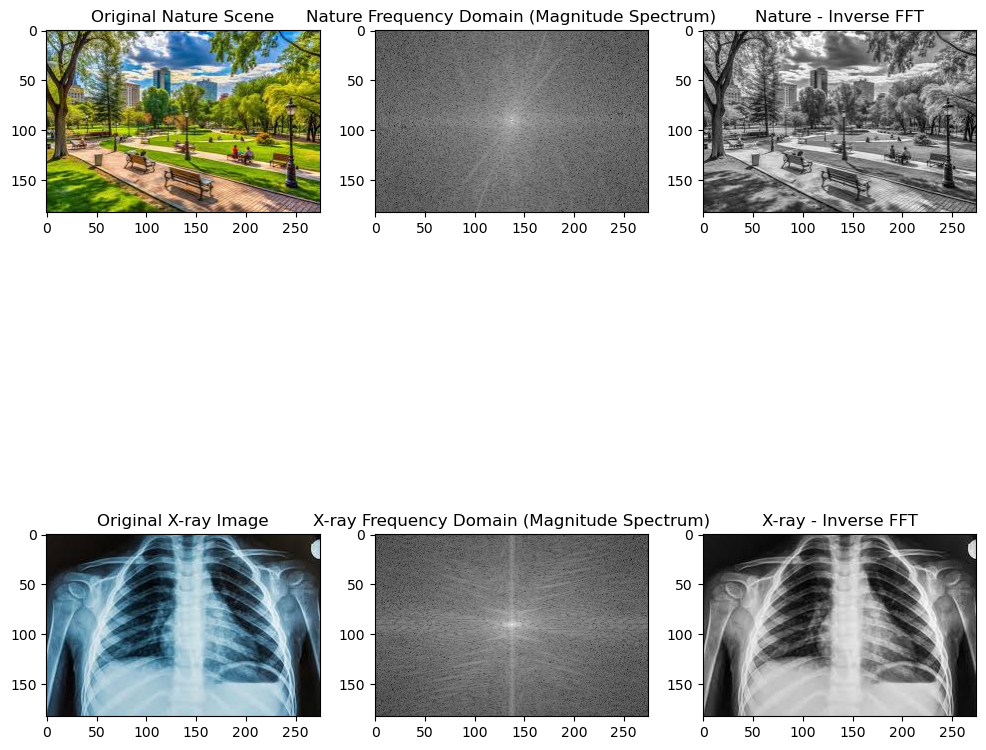

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the images
nature_img = cv2.imread("nature_scene.jpg")  # Replace with the actual name of your nature image file
xray_img = cv2.imread("x-ray.jpg")     # Replace with the actual name of your X-ray image file

# Convert images to grayscale
nature_gray = cv2.cvtColor(nature_img, cv2.COLOR_BGR2GRAY)
xray_gray = cv2.cvtColor(xray_img, cv2.COLOR_BGR2GRAY)

# Perform Fourier Transform and shift zero-frequency component to center
nature_fft = np.fft.fftshift(np.fft.fft2(nature_gray))
xray_fft = np.fft.fftshift(np.fft.fft2(xray_gray))

# Get magnitude spectrum and normalize for display
nature_magnitude = 20 * np.log(np.abs(nature_fft) + 1)
xray_magnitude = 20 * np.log(np.abs(xray_fft) + 1)

# Perform Inverse FFT
nature_inverse_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(nature_fft)))
xray_inverse_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(xray_fft)))

# Normalize for imshow (scaling to 0-255)
nature_inverse_fft = cv2.normalize(nature_inverse_fft, None, 0, 255, cv2.NORM_MINMAX)
xray_inverse_fft = cv2.normalize(xray_inverse_fft, None, 0, 255, cv2.NORM_MINMAX)

# Display original and frequency domain images
plt.figure(figsize=(12, 12))

# Nature Image Frequency Analysis
plt.subplot(2, 3, 1)
plt.title('Original Nature Scene')
plt.imshow(cv2.cvtColor(nature_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Nature Frequency Domain (Magnitude Spectrum)')
plt.imshow(nature_magnitude, cmap='gray')

plt.subplot(2, 3, 3)
plt.title('Nature - Inverse FFT')
plt.imshow(nature_inverse_fft, cmap='gray')

# X-ray Image Frequency Analysis
plt.subplot(2, 3, 4)
plt.title('Original X-ray Image')
plt.imshow(cv2.cvtColor(xray_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title('X-ray Frequency Domain (Magnitude Spectrum)')
plt.imshow(xray_magnitude, cmap='gray')

plt.subplot(2, 3, 6)
plt.title('X-ray - Inverse FFT')
plt.imshow(xray_inverse_fft, cmap='gray')

plt.show()


---

### 4. Sampling and Aliasing
When we sample an image at a lower resolution, we reduce the amount of information, which can lead to **aliasing**. Aliasing occurs when high-frequency details are incorrectly represented at lower frequencies, causing distortion or artifacts.

We can simulate aliasing by downscaling the image and then attempting to upscale it, showing how information is lost during the sampling process.


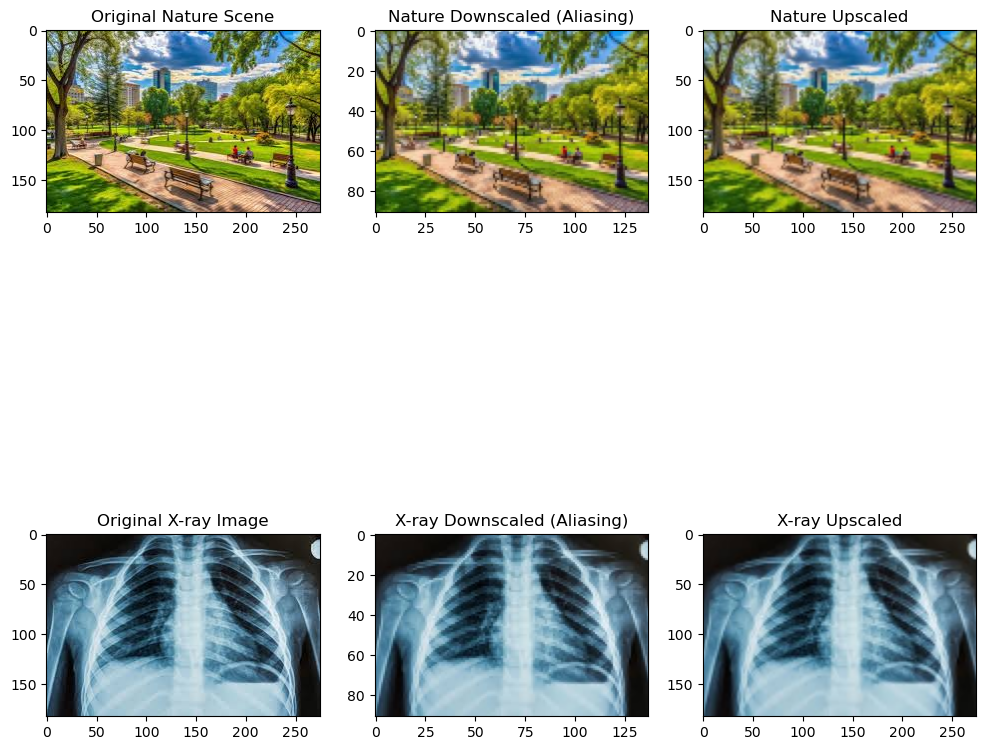

In [5]:
# Downscale images to simulate aliasing
nature_downscaled = cv2.resize(nature_img, (nature_img.shape[1]//2, nature_img.shape[0]//2))
xray_downscaled = cv2.resize(xray_img, (xray_img.shape[1]//2, xray_img.shape[0]//2))

# Upscale the downscaled images back to original size
nature_upsampled = cv2.resize(nature_downscaled, (nature_img.shape[1], nature_img.shape[0]))
xray_upsampled = cv2.resize(xray_downscaled, (xray_img.shape[1], xray_img.shape[0]))

# Display the images
plt.figure(figsize=(12, 12))

# Nature Image Aliasing
plt.subplot(2, 3, 1)
plt.title('Original Nature Scene')
plt.imshow(cv2.cvtColor(nature_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Nature Downscaled (Aliasing)')
plt.imshow(cv2.cvtColor(nature_downscaled, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 3)
plt.title('Nature Upscaled')
plt.imshow(cv2.cvtColor(nature_upsampled, cv2.COLOR_BGR2RGB))

# X-ray Image Aliasing
plt.subplot(2, 3, 4)
plt.title('Original X-ray Image')
plt.imshow(cv2.cvtColor(xray_img, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 5)
plt.title('X-ray Downscaled (Aliasing)')
plt.imshow(cv2.cvtColor(xray_downscaled, cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 6)
plt.title('X-ray Upscaled')
plt.imshow(cv2.cvtColor(xray_upsampled, cv2.COLOR_BGR2RGB))

plt.show()


---

### 5. Filters as Templates
Filters can be used as templates to detect specific features or patterns in an image. For example, **edge detection filters** like the Sobel filter or **sharpening filters** can act as templates to highlight specific features like edges or fine details.

We will demonstrate this concept by applying a template filter for edge detection.


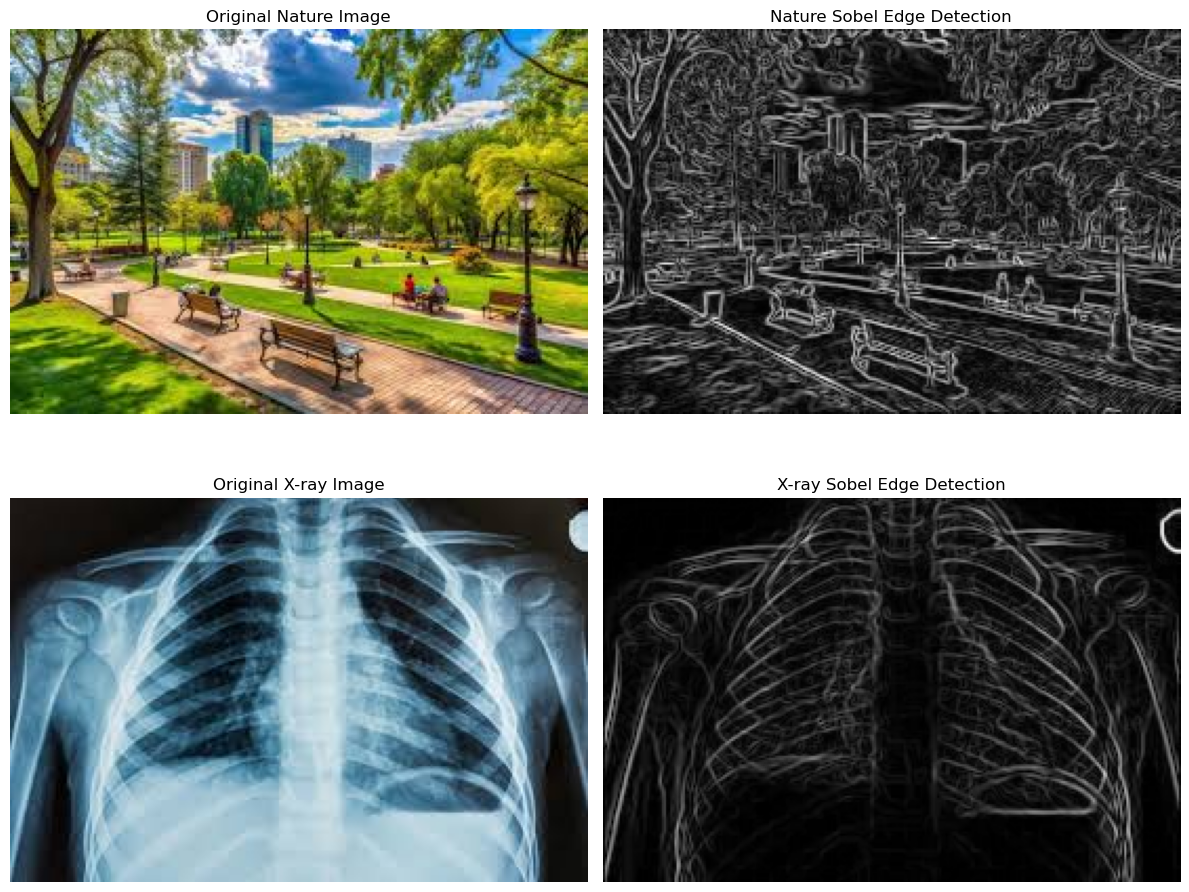

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original images
nature_img = cv2.imread("nature_scene.jpg")
xray_img = cv2.imread("x-ray.jpg")

# Convert images to grayscale
nature_gray = cv2.cvtColor(nature_img, cv2.COLOR_BGR2GRAY)
xray_gray = cv2.cvtColor(xray_img, cv2.COLOR_BGR2GRAY)

# Define Sobel kernels
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])

# Apply Sobel filters
nature_sobel_x = cv2.filter2D(nature_gray, cv2.CV_32F, sobel_x)
nature_sobel_y = cv2.filter2D(nature_gray, cv2.CV_32F, sobel_y)
nature_sobel = cv2.magnitude(nature_sobel_x, nature_sobel_y)

xray_sobel_x = cv2.filter2D(xray_gray, cv2.CV_32F, sobel_x)
xray_sobel_y = cv2.filter2D(xray_gray, cv2.CV_32F, sobel_y)
xray_sobel = cv2.magnitude(xray_sobel_x, xray_sobel_y)

# Normalize Sobel outputs to range [0, 255] for visualization
nature_sobel = cv2.normalize(nature_sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
xray_sobel = cv2.normalize(xray_sobel, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display results
plt.figure(figsize=(12, 10))

# Nature Image Results
plt.subplot(2, 2, 1)
plt.title("Original Nature Image")
plt.imshow(cv2.cvtColor(nature_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Nature Sobel Edge Detection")
plt.imshow(nature_sobel, cmap="gray")
plt.axis("off")

# X-ray Image Results
plt.subplot(2, 2, 3)
plt.title("Original X-ray Image")
plt.imshow(cv2.cvtColor(xray_img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("X-ray Sobel Edge Detection")
plt.imshow(xray_sobel, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()


---

### 6. Noise Estimation and Derivatives
Noise estimation involves detecting and quantifying the noise present in an image. We can use derivatives to estimate how much the pixel values change in different directions. This helps us understand the level of noise and can guide us in denoising the image.

We'll estimate the noise by calculating the **gradient** (derivative) of the image.


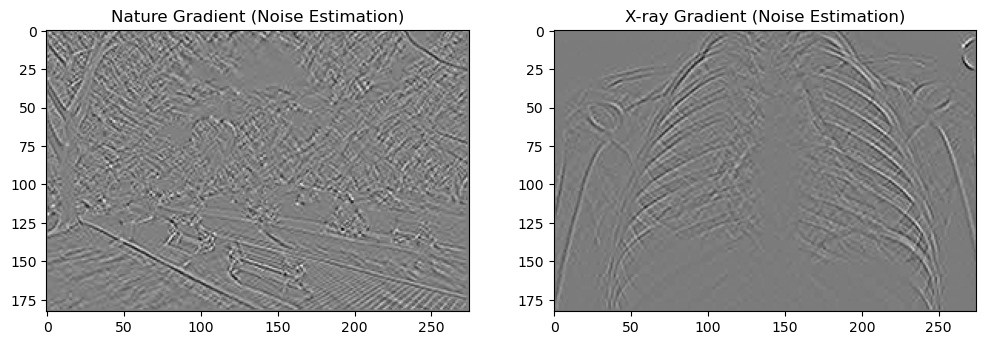

In [15]:
# Compute gradient (derivative) using Sobel
nature_gradient = cv2.Sobel(nature_gray, cv2.CV_64F, 1, 1, ksize=3)
xray_gradient = cv2.Sobel(xray_gray, cv2.CV_64F, 1, 1, ksize=3)

# Display the gradient (derivative) results
plt.figure(figsize=(12, 6))

# Nature Image Gradient (Noise Estimation)
plt.subplot(1, 2, 1)
plt.title('Nature Gradient (Noise Estimation)')
plt.imshow(nature_gradient, cmap='gray')

# X-ray Image Gradient (Noise Estimation)
plt.subplot(1, 2, 2)
plt.title('X-ray Gradient (Noise Estimation)')
plt.imshow(xray_gradient, cmap='gray')

plt.show()


---

### 7. Texture Analysis (Oriented Pyramids)
Texture analysis involves understanding the patterns and structures within an image. One method of texture analysis involves using **oriented pyramids**, where the image is decomposed into several layers, each representing different scales and orientations of the texture.

We will simulate texture analysis using pyramid representations.


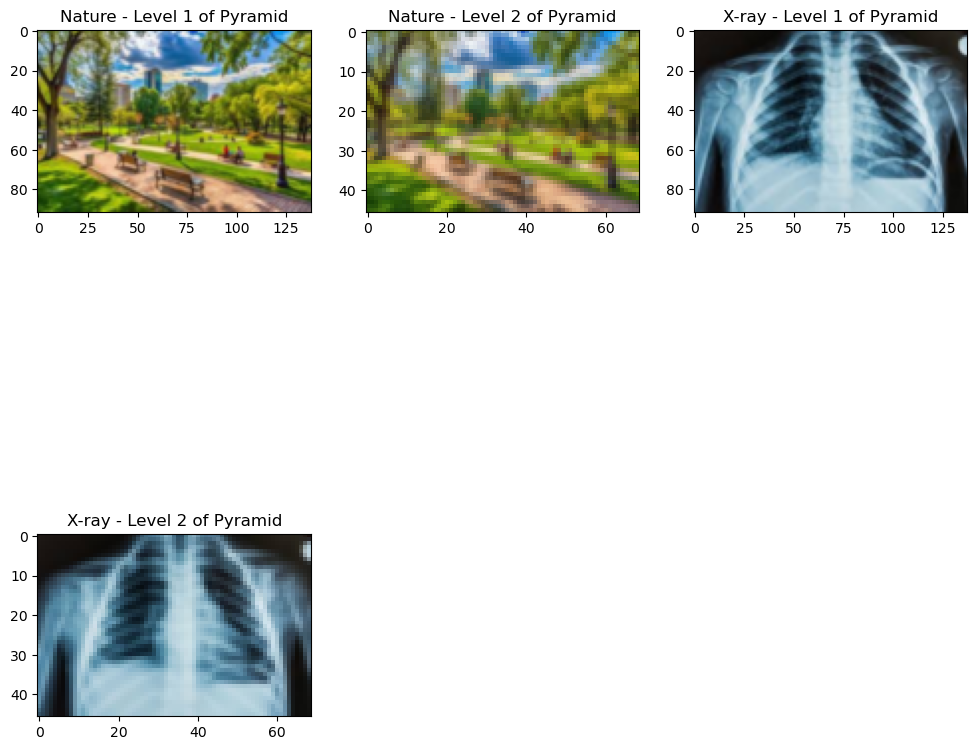

In [17]:
# Create Gaussian pyramid for texture analysis
nature_pyramid = [nature_img]
xray_pyramid = [xray_img]

# Generate pyramid layers
for i in range(5):
    nature_pyramid.append(cv2.pyrDown(nature_pyramid[-1]))
    xray_pyramid.append(cv2.pyrDown(xray_pyramid[-1]))

# Display the pyramid layers
plt.figure(figsize=(12, 12))

# Nature Image Pyramid (Texture Analysis)
plt.subplot(2, 3, 1)
plt.title('Nature - Level 1 of Pyramid')
plt.imshow(cv2.cvtColor(nature_pyramid[1], cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 2)
plt.title('Nature - Level 2 of Pyramid')
plt.imshow(cv2.cvtColor(nature_pyramid[2], cv2.COLOR_BGR2RGB))

# X-ray Image Pyramid (Texture Analysis)
plt.subplot(2, 3, 3)
plt.title('X-ray - Level 1 of Pyramid')
plt.imshow(cv2.cvtColor(xray_pyramid[1], cv2.COLOR_BGR2RGB))

plt.subplot(2, 3, 4)
plt.title('X-ray - Level 2 of Pyramid')
plt.imshow(cv2.cvtColor(xray_pyramid[2], cv2.COLOR_BGR2RGB))

plt.show()
